In [1]:
%load_ext autotime

time: 0 ns (started: 2021-09-20 18:12:30 -06:00)


In [2]:
import pandas as pd
import numpy as np

# Load twitter dataset as a pandas dataframe
# dataset source - https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech
tweets_df = pd.read_csv("twitter.csv")
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


time: 1.28 s (started: 2021-09-20 18:12:30 -06:00)


In [3]:
print("A tweet with positive sentiment:", tweets_df[tweets_df['label']==0].tweet.iloc[3])
print("A tweet with negative sentiment:", tweets_df[tweets_df['label']==1].tweet.iloc[5])

A tweet with positive sentiment: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
A tweet with negative sentiment: @user lets fight against  #love #peace 
time: 0 ns (started: 2021-09-20 18:12:32 -06:00)


In [4]:
tweets_df.drop(['id'], axis=1, inplace=True) #inplace=True drops 'id' column in the original dataframe

time: 15 ms (started: 2021-09-20 18:12:32 -06:00)


<AxesSubplot:xlabel='label', ylabel='count'>

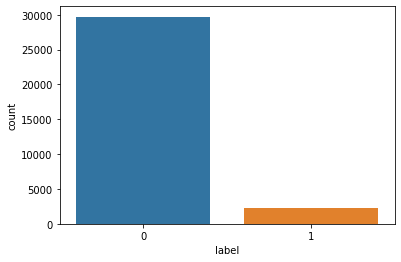

time: 1.83 s (started: 2021-09-20 18:12:32 -06:00)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=tweets_df)

In [6]:
import string
import nltk # Natural Language tool kit 
from nltk.corpus import stopwords
#print(string.punctuation)
#print(stopwords.words('english'))

# Create cleaned stopwords list by removing punctuations
stopwords_new = stopwords.words('english')+['user'] # add the word 'user' as a stopword since it has no value
stopwords_new = ''.join([ch for ch in ' '.join(stopwords_new) if ch not in string.punctuation]).split(' ')

# Create a function that filters punctuations and stop words from any text
def preprocess_text(text):
    filtered_text = ''.join([ch for ch in text if ch not in string.punctuation])
    preprocessed_text = ' '.join([word for word in filtered_text.split() if word.lower() not in stopwords_new])
    return preprocessed_text

time: 1.33 s (started: 2021-09-20 18:12:34 -06:00)


In [7]:
# Use the above function on every row of our tweets_df
tweets_df['clean_tweet'] = tweets_df.tweet.map(lambda row: preprocess_text(row))
tweets_df.head(2)

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause offer wheelc...


time: 1.03 s (started: 2021-09-20 18:12:35 -06:00)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer_obj = CountVectorizer(dtype = 'uint8') # dtype describes the datatype of each element of the Count matrix
# Unsigned integer of 8 bits can take any value between 0 and 255 (=2^8-1). Since number of characters in a tweet is 
# fixed at 140 (now 280 - https://help.twitter.com/en/using-twitter/how-to-tweet), we do not expect any tweet to 
# have a word that is repeated 255 times.
tweets_countvectorizer = countvectorizer_obj.fit_transform(tweets_df['clean_tweet'])
tweets_countvectorizer.shape

(31962, 43654)

time: 531 ms (started: 2021-09-20 18:12:36 -06:00)


In [9]:
X = pd.DataFrame(tweets_countvectorizer.toarray())
y = tweets_df['label']

time: 203 ms (started: 2021-09-20 18:12:36 -06:00)


In [10]:
from sklearn.model_selection import train_test_split
train_X, dev_X, train_y, dev_y = train_test_split(X, y, test_size=0.2, stratify=tweets_df['label'])

time: 2.31 s (started: 2021-09-20 18:12:37 -06:00)


In [11]:
print('Training dataset')

print('Total number of tweets: ', len(train_y))
print('Number of positive tweets: ', sum(train_y==0))
print('Number of negative tweets: ', sum(train_y==1))


print('\nValidation dataset')

print('Total number of tweets: ', len(dev_y))
print('Number of positive tweets: ', sum(dev_y==0))
print('Number of negative tweets: ', sum(dev_y==1))

Training dataset
Total number of tweets:  25569
Number of positive tweets:  23775
Number of negative tweets:  1794

Validation dataset
Total number of tweets:  6393
Number of positive tweets:  5945
Number of negative tweets:  448
time: 15 ms (started: 2021-09-20 18:12:39 -06:00)


In [12]:
# Load imblearn python package for handling imbalanced dataset
# To install imblearn package, uncomment the below line of code
#!pip install imblearn
import imblearn
print(imblearn.__version__)

0.8.0
time: 266 ms (started: 2021-09-20 18:12:39 -06:00)


In [13]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority') #sampling_strategy lets you 
# define imbalanced data handling strategy
# For more details, see https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html
oversampled_train_X, oversampled_train_y = oversample.fit_resample(train_X, train_y)

time: 1min 38s (started: 2021-09-20 18:12:39 -06:00)


In [14]:
print('After balancing the training dataset')

print('Number of positive tweets: ', sum(oversampled_train_y==0))
print('Number of negative tweets: ', sum(oversampled_train_y==1))

After balancing the training dataset
Number of positive tweets:  23775
Number of negative tweets:  23775
time: 47 ms (started: 2021-09-20 18:14:18 -06:00)


In [15]:
oversampled_train_X.shape

(47550, 43654)

time: 16 ms (started: 2021-09-20 18:14:18 -06:00)


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(oversampled_train_X, 
                                             oversampled_train_y)

MemoryError: Unable to allocate 15.5 GiB for an array with shape (47550, 43654) and data type float64

time: 44.1 s (started: 2021-09-20 18:41:38 -06:00)


Bummer!

Fitting scikit learn's logistic regression on twitter dataset will cost 15.5GiB, which is huge. I will need to look into how to fit logistic model on twitter dataset using maximum likelihood estimation instead of maximizing cross entropy which is default setting of scikit learn's ```LogisticRegression``` model.